# **1. Green Energy Program Grants (GEPG) Data**

Description: https://dnrec.alpha.delaware.gov/climate-coastal-energy/renewable/assistance/

Dataset: https://data.delaware.gov/Energy-and-Environment/Green-Energy-Program-Grants/nsgd-n2gb

Reports: https://dnrec.alpha.delaware.gov/climate-coastal-energy/renewable/assistance/

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from sodapy import Socrata
import pygris
import PyPDF2
import seaborn as sns
from scipy import stats
import json
pd.options.display.max_columns = 100

In [2]:
client = Socrata("data.delaware.gov", None)
results = client.get("nsgd-n2gb", limit=8000)

GEPG_df = pd.DataFrame.from_records(results)

In [3]:
if (len(GEPG_df) - 7171) > 0:
    print(90*"!")
    print("** Warning: There has been a change in the length of the dataset since September 1, 2023. **")
    print(90*"!")
else:
    print("No update since September 1, 2023.")

No update since September 1, 2023.


In [4]:
myfile = open("/Users/kamran/Downloads/Datasets/Data_Dictionary_for_Green_Energy_Program_Grants.pdf",mode='rb')

In [5]:
pdf_reader = PyPDF2.PdfReader(myfile)

In [6]:
len(pdf_reader.pages)

1

In [7]:
page_one = pdf_reader.pages[0]
print(page_one.extract_text())

Data Dictionary for Dataset:  Green Energy Program Grants  
 
Column  Column Name / Field 
Name  Description  
A Application ID  Unique identifier for each grant application  
B City City in which the project is located  
C Zip Zip code in which the project is located  
D Application Submission Date  Date of submission of grant application  
E Facility Type  Renewable energy source for which grant 
application has been submitted:  PV (photovoltaic), 
Geothermal, Solar Wa ter Heating, Wind  
F Sector  Type of Project:  Residential, Non_Residential, 
Commercial, Non_Profit, Solar Lease, Solar PPA 
(Power Purchase Agreement)  
G PV Capacity (kW)  Size in kilowatts of photovoltaic system  
H Geothermal Capacity (tons)  Size in tons of  geothermal system  
I Wind Capacity (kW)  Size in kilowatts of windpower system  
J Solar Water Capacity (Sq. Ft.)  Size in square feet of solar water heater system  
K Total System Costs ($)  Sum of money spent on renewable energy system  
L Total Rebate  S

In [8]:
page_one_text = page_one.extract_text()

In [9]:
myfile.close()

In [10]:
GEPG_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7171 entries, 0 to 7170
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   application_id               7171 non-null   object
 1   city                         7171 non-null   object
 2   zip                          7170 non-null   object
 3   application_submission_date  7171 non-null   object
 4   facility_type                7170 non-null   object
 5   sector                       7171 non-null   object
 6   pv_capacity_kw               6163 non-null   object
 7   total_system_costs           7161 non-null   object
 8   total_rebate                 7171 non-null   object
 9   payment_status               7171 non-null   object
 10  mounting_location            4952 non-null   object
 11  ppa_lease                    4952 non-null   object
 12  geothermal_capacity_tons     922 non-null    object
 13  solar_water_capacity_sq_ft   63 n

In [11]:
GEPG_df.head()

,application_id,city,zip,application_submission_date,facility_type,sector,pv_capacity_kw,total_system_costs,total_rebate,payment_status,mounting_location,ppa_lease,geothermal_capacity_tons,solar_water_capacity_sq_ft,wind_capacity_kw
0,R00437,Bear,19701,2008-07-25T00:00:00.000,PV,Residential,0.3,3194.67,1322.38,Paid,NaN,NaN,NaN,NaN,NaN
1,R00400,Middletown,19709,2008-04-07T00:00:00.000,PV,Residential,0.426,3000.00,903.00,Paid,NaN,NaN,NaN,NaN,NaN
2,R00837,Ocean View,19970,2009-06-18T00:00:00.000,PV,Residential,0.57,4703.00,1175.75,Paid,NaN,NaN,NaN,NaN,NaN
3,R01477,Rehoboth Beach,19971,2012-01-06T00:00:00.000,PV,Residential,0.84,3847.20,1050.00,Paid,NaN,NaN,NaN,NaN,NaN
4,R01176,Middletown,19709,2010-11-30T00:00:00.000,PV,Residential,0.92,5060.00,1265.00,Paid,NaN,NaN,NaN,NaN,NaN


In [12]:
GEPG_df.isnull().sum()

application_id                    0
city                              0
zip                               1
application_submission_date       0
facility_type                     1
sector                            0
pv_capacity_kw                 1008
total_system_costs               10
total_rebate                      0
payment_status                    0
mounting_location              2219
ppa_lease                      2219
geothermal_capacity_tons       6249
solar_water_capacity_sq_ft     7108
wind_capacity_kw               7153
dtype: int64

In [13]:
GEPG_df.isnull().sum()*100/len(GEPG_df)

application_id                  0.000000
city                            0.000000
zip                             0.013945
application_submission_date     0.000000
facility_type                   0.013945
sector                          0.000000
pv_capacity_kw                 14.056617
total_system_costs              0.139451
total_rebate                    0.000000
payment_status                  0.000000
mounting_location              30.944080
ppa_lease                      30.944080
geothermal_capacity_tons       87.142658
solar_water_capacity_sq_ft     99.121461
wind_capacity_kw               99.748989
dtype: float64

# **2. Data Cleaning and Data Engineering**

In [14]:
GEPG_df.drop(['geothermal_capacity_tons','solar_water_capacity_sq_ft','wind_capacity_kw'],axis=1,inplace=True)

In [15]:
GEPG_df[GEPG_df['zip'].isnull()]

,application_id,city,zip,application_submission_date,facility_type,sector,pv_capacity_kw,total_system_costs,total_rebate,payment_status,mounting_location,ppa_lease
6172,NR00003,Lost due to Fire,NaN,2003-04-07T00:00:00.000,Geothermal,Non_Residential,NaN,NaN,25000.00,Paid,NaN,NaN


In [16]:
GEPG_df.drop(GEPG_df[GEPG_df['zip'].isnull()].any(axis=1).index,inplace=True)

In [17]:
GEPG_df['Zip5digits'] = GEPG_df['zip'].apply(lambda x: x[:5] )

In [18]:
GEPG_df['Zip5digits']

0       19701
1       19709
2       19970
3       19971
4       19709
        ...  
7166    19930
7167    19930
7168    19707
7169    19930
7170    19944
Name: Zip5digits, Length: 7170, dtype: object

In [19]:
GEPG_df.groupby('Zip5digits').count().sort_values(by='application_id')

,application_id,city,zip,application_submission_date,facility_type,sector,pv_capacity_kw,total_system_costs,total_rebate,payment_status,mounting_location,ppa_lease
Zip5digits,,,,,,,,,,,,
1073,1,1,1,1,1,1,0,1,1,1,0,0
23323,1,1,1,1,1,1,0,1,1,1,0,0
22180,1,1,1,1,1,1,1,1,1,1,1,1
21012,1,1,1,1,1,1,1,1,1,1,1,1
20814,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
19702,411,411,411,411,411,411,398,411,411,411,362,362
19720,438,438,438,438,438,438,433,438,438,438,384,384
19701,570,570,570,570,570,570,540,570,570,570,471,471


In [20]:
GEPG_df[GEPG_df['Zip5digits'].astype('int64') >= 20000]

,application_id,city,zip,application_submission_date,facility_type,sector,pv_capacity_kw,total_system_costs,total_rebate,payment_status,mounting_location,ppa_lease,Zip5digits
2021,9225,Annapolis,21012,2017-04-23T19:46:00.000,PV,residential,5000,6120,2500,Unpaid,rooftop,owned,21012
2204,5238,Rehoboth Beach,89119,2014-10-16T15:14:00.000,PV,residential,5355,26775,4338.75,Paid,rooftop,lease,89119
3890,8370,Bethany Beach,20814,2017-08-02T17:07:00.000,PV,residential,8250,16900,3300,Paid,rooftop,owned,20814
4310,5287,Bear,94607,2014-10-21T01:24:00.000,PV,residential,9000,35460,5250,Unpaid,rooftop,lease,94607
5160,11627,Ocean View,22180,2022-10-06T11:24:00.000,PV,residential,11200,23632,8000,Unpaid,rooftop,owned,22180
6910,5104,Chesapeake,23323,2020-06-18T16:42:00.000,Wind,non_residential,NaN,8,17750,Unpaid,NaN,NaN,23323


In [21]:
len(GEPG_df[GEPG_df['Zip5digits'].astype('int64') >= 20000])

6

In [22]:
GEPG_df[GEPG_df['Zip5digits'].astype('int64') <= 19700]

,application_id,city,zip,application_submission_date,facility_type,sector,pv_capacity_kw,total_system_costs,total_rebate,payment_status,mounting_location,ppa_lease,Zip5digits
1531,8812,New Castle,17920,2016-12-20T14:39:00.000,PV,residential,3640,26260,1000,Paid,rooftop,lease,17920
2566,12031,Townsend,17934,2023-03-16T10:01:00.000,PV,residential,5920,28416,4736,Unpaid,rooftop,owned,17934
3308,11110,Newark,19173,2022-03-30T09:08:00.000,PV,residential,7200,75000,5040,Paid,rooftop,owned,19173
3790,12218,South Bethany,19330,2023-02-24T00:21:00.000,PV,residential,8075,24647,6460,Unpaid,rooftop,owned,19330
5303,10039,Newark,19173,2020-07-07T20:10:00.000,PV,residential,11840,45954,5000,Paid,rooftop,owned,19173
5608,11421,Wilmington,18903,2022-08-25T08:59:00.000,PV,residential,13320,79920,5760,Unpaid,rooftop,owned,18903
7155,11333,SOUTHAMPTON,1073,2022-06-23T11:11:00.000,Geothermal,residential,NaN,9400,5000,Unpaid,NaN,NaN,1073


In [23]:
GEPG_df = GEPG_df[(GEPG_df['Zip5digits'].astype('int64') >= 19700) & (GEPG_df['Zip5digits'].astype('int64') < 20000)]

In [24]:
GEPG_df.drop(['application_id','zip'],axis=1,inplace=True)

In [25]:
GEPG_df['date'] = pd.to_datetime(GEPG_df['application_submission_date'])

In [26]:
GEPG_df['year'] = GEPG_df['date'].dt.strftime('%Y')

In [27]:
GEPG_df['month'] = GEPG_df['date'].dt.strftime('%m')

In [28]:
GEPG_df.drop(['application_submission_date'],axis=1,inplace=True)

In [29]:
GEPG_df.drop(GEPG_df[GEPG_df['facility_type'].isnull()].index,axis=0,inplace=True)

<Axes: xlabel='facility_type'>

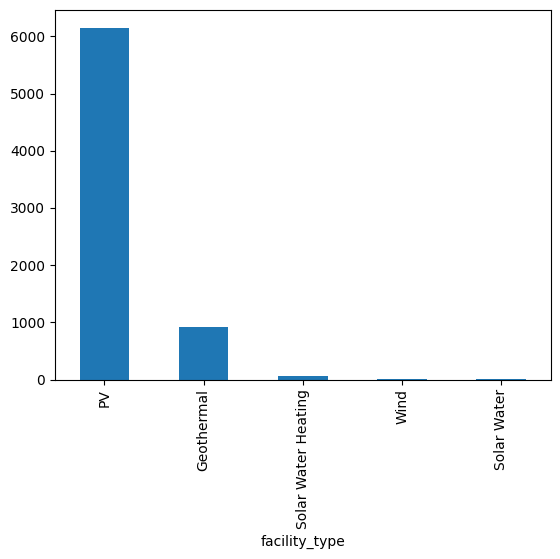

In [30]:
GEPG_df['facility_type'].value_counts().plot.bar()

In [31]:
GEPG_df['sector'] = GEPG_df['sector'].str.lower()

<Axes: xlabel='sector'>

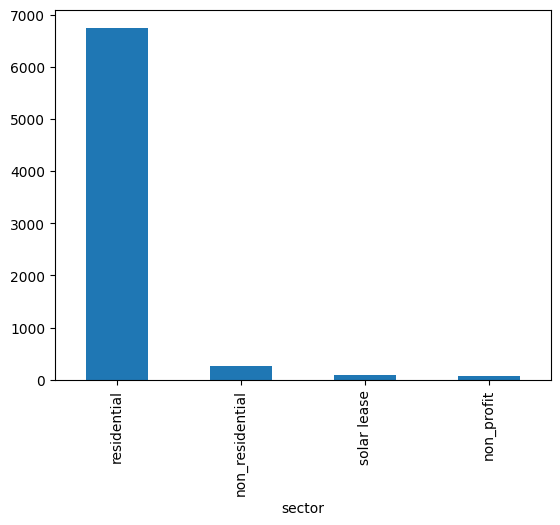

In [32]:
GEPG_df['sector'].value_counts().plot.bar()

In [33]:
GEPG_df.drop(GEPG_df[(GEPG_df['facility_type']=='PV') & 
                     (GEPG_df['pv_capacity_kw'].isnull())].index,axis=0,inplace=True)

In [34]:
GEPG_df['pv_capacity_kw'] = GEPG_df['pv_capacity_kw'].fillna(value=0)

In [35]:
GEPG_df['pv_capacity_kw'] = GEPG_df['pv_capacity_kw'].astype('float')

In [36]:
GEPG_df[GEPG_df['facility_type']=='PV']['pv_capacity_kw'].describe()

count      6152.000000
mean       7779.407645
std       18903.811090
min           0.300000
25%        3671.250000
50%        6760.000000
75%        9620.000000
max      908900.000000
Name: pv_capacity_kw, dtype: float64

In [37]:
GEPG_df['total_system_costs'] = GEPG_df['total_system_costs'].astype('float')

In [38]:
GEPG_df[GEPG_df['total_system_costs'].isnull()]

,city,facility_type,sector,pv_capacity_kw,total_system_costs,total_rebate,payment_status,mounting_location,ppa_lease,Zip5digits,date,year,month
64,Wilmington,PV,non_residential,2.35,NaN,4993.75,Paid,NaN,NaN,19806,2012-05-09,2012,05
6204,Rehoboth Beach,Geothermal,residential,0.00,NaN,3000.00,Paid,NaN,NaN,19971,2005-03-03,2005,03
6675,Rehoboth Beach,Geothermal,residential,0.00,NaN,3000.00,Paid,NaN,NaN,19971,2010-12-29,2010,12
6709,Newark,Geothermal,non_profit,0.00,NaN,14800.00,Paid,NaN,NaN,19711,2011-06-20,2011,06
6716,Claymont,Geothermal,residential,0.00,NaN,2300.00,Paid,NaN,NaN,19703,2011-07-07,2011,07
6739,Hockessin,Geothermal,residential,0.00,NaN,4400.00,Paid,NaN,NaN,19707,2011-09-12,2011,09
6743,Seaford,Geothermal,residential,0.00,NaN,3700.00,Paid,NaN,NaN,19973,2011-09-19,2011,09
6887,Newark,Geothermal,residential,0.00,NaN,2300.00,Paid,NaN,NaN,19711,2013-09-26,2013,09
6889,Dewey Beach,Geothermal,residential,0.00,NaN,5000.00,Paid,NaN,NaN,19971,2013-10-15,2013,10


In [39]:
GEPG_df.drop(GEPG_df[GEPG_df['total_system_costs'].isnull()].index,axis=0,inplace=True)

In [40]:
GEPG_df['total_rebate'] = GEPG_df['total_rebate'].astype('float')

In [41]:
GEPG_df['payment_status'] = GEPG_df['payment_status'].str.lower()

In [42]:
GEPG_df['payment_status'].value_counts()

payment_status
paid           5503
unpaid         1326
pending         202
paid - arra     115
Name: count, dtype: int64

In [43]:
GEPG_df['mounting_location'].value_counts()

mounting_location
rooftop     4849
ground        91
tracking       1
Name: count, dtype: int64

In [44]:
GEPG_df[GEPG_df['mounting_location']=='tracking']

,city,facility_type,sector,pv_capacity_kw,total_system_costs,total_rebate,payment_status,mounting_location,ppa_lease,Zip5digits,date,year,month
1332,New Castle,PV,residential,2600.0,13655.0,1000.0,paid,tracking,lease,19720,2017-02-03 20:04:00,2017,02


In [45]:
GEPG_df['facility_type'].value_counts()

facility_type
PV                     6151
Geothermal              915
Solar Water Heating      62
Wind                     13
Solar Water               5
Name: count, dtype: int64

In [46]:
GEPG_PV_df = GEPG_df[GEPG_df['facility_type']=='PV']

In [47]:
GEPG_PV_df['mounting_location'].value_counts()

mounting_location
rooftop     4849
ground        91
tracking       1
Name: count, dtype: int64

In [48]:
GEPG_PV_df['mounting_location'].isnull().sum() * 100 / len(GEPG_PV_df['mounting_location'])

19.671598114127786

In [49]:
GEPG_df['mounting_location'].isnull().sum() * 100 / len(GEPG_df['mounting_location'])

30.856423173803528

In [50]:
GEPG_PV_df[(GEPG_PV_df['sector']=='solar lease') & (GEPG_PV_df['ppa_lease'].notnull())]

,city,facility_type,sector,pv_capacity_kw,total_system_costs,total_rebate,payment_status,mounting_location,ppa_lease,Zip5digits,date,year,month


In [51]:
GEPG_PV_df[(GEPG_PV_df['sector']=='solar lease') & (GEPG_PV_df['mounting_location'].notnull())]

,city,facility_type,sector,pv_capacity_kw,total_system_costs,total_rebate,payment_status,mounting_location,ppa_lease,Zip5digits,date,year,month


In [52]:
GEPG_PV_df.loc[GEPG_PV_df['sector'] == 'solar lease', 'mounting_location'] = GEPG_PV_df['mounting_location'].fillna('lease')

In [53]:
GEPG_PV_df.isnull().sum()

city                     0
facility_type            0
sector                   0
pv_capacity_kw           0
total_system_costs       0
total_rebate             0
payment_status           0
mounting_location     1125
ppa_lease             1210
Zip5digits               0
date                     0
year                     0
month                    0
dtype: int64

In [54]:
GEPG_PV_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6151 entries, 0 to 6162
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   city                6151 non-null   object        
 1   facility_type       6151 non-null   object        
 2   sector              6151 non-null   object        
 3   pv_capacity_kw      6151 non-null   float64       
 4   total_system_costs  6151 non-null   float64       
 5   total_rebate        6151 non-null   float64       
 6   payment_status      6151 non-null   object        
 7   mounting_location   5026 non-null   object        
 8   ppa_lease           4941 non-null   object        
 9   Zip5digits          6151 non-null   object        
 10  date                6151 non-null   datetime64[ns]
 11  year                6151 non-null   object        
 12  month               6151 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(9)
memory us

In [55]:
GEPG_PV_df['sector'].value_counts() * 100 / len(GEPG_PV_df['sector'])

sector
residential        93.903430
non_residential     3.722972
solar lease         1.381889
non_profit          0.991709
Name: count, dtype: float64

In [56]:
GEPG_PV_df['ppa_lease'].value_counts() * 100 / len(GEPG_PV_df['ppa_lease'])

ppa_lease
owned    51.406275
lease    19.947976
ppa       8.974151
Name: count, dtype: float64

In [57]:
GEPG_PV_df[(GEPG_PV_df['sector']=='non_residential') & (GEPG_PV_df['ppa_lease'].notnull())]['ppa_lease'].value_counts() * 100 / len(GEPG_PV_df[(GEPG_PV_df['sector']=='non_residential') & (GEPG_PV_df['ppa_lease'].notnull())]['ppa_lease'])

ppa_lease
owned    97.619048
lease     2.380952
Name: count, dtype: float64

In [58]:
GEPG_PV_df.loc[GEPG_PV_df['sector'] == 'non_residential', 'ppa_lease'] = GEPG_PV_df['ppa_lease'].fillna('owned')

In [59]:
GEPG_PV_df[(GEPG_PV_df['sector']=='non_profit') & (GEPG_PV_df['ppa_lease'].notnull())]['ppa_lease'].value_counts() * 100 / len(GEPG_PV_df[(GEPG_PV_df['sector']=='non_profit') & (GEPG_PV_df['ppa_lease'].notnull())]['ppa_lease'])

ppa_lease
owned    91.304348
lease     8.695652
Name: count, dtype: float64

In [60]:
GEPG_PV_df.loc[GEPG_PV_df['sector'] == 'non_profit', 'ppa_lease'] = GEPG_PV_df['ppa_lease'].fillna('owned')

In [61]:
GEPG_PV_df[(GEPG_PV_df['sector']=='residential') & (GEPG_PV_df['ppa_lease'].notnull())]['ppa_lease'].value_counts() * 100 / len(GEPG_PV_df[(GEPG_PV_df['sector']=='residential') & (GEPG_PV_df['ppa_lease'].notnull())]['ppa_lease'])

ppa_lease
owned    63.146955
lease    25.379339
ppa      11.473706
Name: count, dtype: float64

In [62]:
GEPG_PV_df[(GEPG_PV_df['sector']=='residential') & (GEPG_PV_df['ppa_lease']=='lease')].head()

,city,facility_type,sector,pv_capacity_kw,total_system_costs,total_rebate,payment_status,mounting_location,ppa_lease,Zip5digits,date,year,month
1215,Wilmington,PV,residential,780.0,20826.0,429.0,paid,rooftop,lease,19805,2016-09-21 17:06:00,2016,09
1216,NEWARK,PV,residential,780.0,50908.0,429.0,paid,rooftop,lease,19713,2016-09-08 16:32:00,2016,09
1218,Newark,PV,residential,1040.0,14705.0,572.0,unpaid,rooftop,lease,19702,2017-07-12 16:20:00,2017,07
1219,WIlmington,PV,residential,1300.0,10413.0,715.0,unpaid,rooftop,lease,19808,2016-09-20 14:59:00,2016,09
1220,Claymont,PV,residential,1300.0,30082.0,715.0,paid,rooftop,lease,19703,2016-09-27 19:09:00,2016,09


In [63]:
GEPG_PV_df[(GEPG_PV_df['sector']=='residential') & (GEPG_PV_df['ppa_lease']=='lease')]['year'].value_counts()

year
2016    470
2015    414
2017    198
2014    138
2018      1
Name: count, dtype: int64

In [64]:
GEPG_PV_df[(GEPG_PV_df['sector']=='residential') & (GEPG_PV_df['ppa_lease']=='ppa')]['year'].value_counts()

year
2016    301
2015    104
2017     84
2014     63
Name: count, dtype: int64

In [65]:
GEPG_PV_df[(GEPG_PV_df['sector']=='residential') & (GEPG_PV_df['ppa_lease']=='owned')]['year'].value_counts()

year
2022    866
2021    554
2023    444
2020    259
2015    201
2019    191
2016    169
2018    168
2017    140
2014     46
Name: count, dtype: int64

In [66]:
GEPG_PV_df[(GEPG_PV_df['sector']=='residential') & (GEPG_PV_df['ppa_lease'].isnull())]['year'].value_counts()

year
2008    184
2009    177
2013    150
2012    137
2010    128
2011     96
2007     51
2006     32
2005      4
2002      2
2003      2
2004      2
Name: count, dtype: int64

Since all of the missing values are older than 2014, and since residential sector is owned, we assign them as owned.

In [67]:
GEPG_PV_df.loc[GEPG_PV_df['sector'] == 'residential', 'ppa_lease'] = GEPG_PV_df['ppa_lease'].fillna('owned')

In [68]:
GEPG_PV_df[(GEPG_PV_df['sector']=='solar lease') & (GEPG_PV_df['ppa_lease'].notnull())]['ppa_lease'].value_counts() * 100 / len(GEPG_PV_df[(GEPG_PV_df['sector']=='solar lease') & (GEPG_PV_df['ppa_lease'].notnull())]['ppa_lease'])

Series([], Name: count, dtype: float64)

In [69]:
GEPG_PV_df[(GEPG_PV_df['sector']=='solar lease') & (GEPG_PV_df['ppa_lease'].isnull())]['year'].value_counts()

year
2013    65
2012    15
2011     5
Name: count, dtype: int64

In [70]:
GEPG_PV_df[GEPG_PV_df['sector']=='solar lease'].index

Index([  31,   32,   80,  114,  115,  139,  146,  152,  177,  241,  271,  284,
        286,  301,  315,  316,  379,  415,  429,  430,  442,  491,  498,  499,
        531,  536,  564,  565,  597,  615,  635,  650,  666,  670,  676,  693,
        700,  701,  705,  714,  723,  733,  743,  776,  777,  780,  799,  800,
        804,  809,  836,  880,  891,  901,  906,  911,  912,  916,  917,  918,
        933,  951,  958,  961,  969,  984,  988,  996, 1001, 1002, 1003, 1004,
       1007, 1015, 1020, 1024, 1034, 1035, 1068, 1084, 1088, 1093, 1103, 1107,
       1112],
      dtype='int64')

In [71]:
GEPG_PV_df.drop(GEPG_PV_df[GEPG_PV_df['sector']=='solar lease'].index,axis=0,inplace=True)

/var/folders/75/y16smf2j5032r_8n2vhxct6r0000gn/T/ipykernel_25014/4284379894.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GEPG_PV_df.drop(GEPG_PV_df[GEPG_PV_df['sector']=='solar lease'].index,axis=0,inplace=True)


In [72]:
GEPG_PV_df[GEPG_PV_df['sector']=='solar lease'].index

Index([], dtype='int64')

In [73]:
GEPG_PV_df.isnull().sum()

city                     0
facility_type            0
sector                   0
pv_capacity_kw           0
total_system_costs       0
total_rebate             0
payment_status           0
mounting_location     1125
ppa_lease                0
Zip5digits               0
date                     0
year                     0
month                    0
dtype: int64

In [74]:
GEPG_PV_df[(GEPG_PV_df['sector']=='residential') & (GEPG_PV_df['mounting_location'].notnull())]['mounting_location'].value_counts() * 100 / len(GEPG_PV_df[(GEPG_PV_df['sector']=='residential') & (GEPG_PV_df['mounting_location'].notnull())]['mounting_location'])

mounting_location
rooftop     98.337144
ground       1.642070
tracking     0.020786
Name: count, dtype: float64

In [75]:
GEPG_PV_df.loc[GEPG_PV_df['sector'] == 'residential', 'mounting_location'] = GEPG_PV_df['mounting_location'].fillna('rooftop')

In [76]:
GEPG_PV_df[(GEPG_PV_df['sector']=='non_profit') & (GEPG_PV_df['mounting_location'].notnull())]['mounting_location'].value_counts() * 100 / len(GEPG_PV_df[(GEPG_PV_df['sector']=='non_profit') & (GEPG_PV_df['mounting_location'].notnull())]['mounting_location'])

mounting_location
rooftop    93.478261
ground      6.521739
Name: count, dtype: float64

In [77]:
GEPG_PV_df.loc[GEPG_PV_df['sector'] == 'non_profit', 'mounting_location'] = GEPG_PV_df['mounting_location'].fillna('rooftop')

In [78]:
GEPG_PV_df[(GEPG_PV_df['sector']=='non_residential') & (GEPG_PV_df['mounting_location'].notnull())]['mounting_location'].value_counts() * 100 / len(GEPG_PV_df[(GEPG_PV_df['sector']=='non_residential') & (GEPG_PV_df['mounting_location'].notnull())]['mounting_location'])

mounting_location
rooftop    89.285714
ground     10.714286
Name: count, dtype: float64

In [79]:
GEPG_PV_df[(GEPG_PV_df['sector']=='non_residential')  
           & (GEPG_PV_df['mounting_location']=='ground')]['pv_capacity_kw'].describe()

count         9.000000
mean     149323.333333
std      265001.636504
min       14820.000000
25%       48000.000000
50%       50000.000000
75%       92800.000000
max      849250.000000
Name: pv_capacity_kw, dtype: float64

In [80]:
GEPG_PV_df[(GEPG_PV_df['sector']=='non_residential') 
           & (GEPG_PV_df['mounting_location']=='rooftop')]['pv_capacity_kw'].describe()

count        75.000000
mean      37619.133333
std       37021.877228
min        4575.000000
25%       17962.500000
50%       28835.000000
75%       48750.000000
max      282575.000000
Name: pv_capacity_kw, dtype: float64

In [81]:
GEPG_PV_df[(GEPG_PV_df['sector']=='non_residential') 
           & (GEPG_PV_df['mounting_location'].isnull())]['pv_capacity_kw'].describe()

count     145.000000
mean       46.377138
std       131.001573
min         1.456000
25%        10.000000
50%        20.700000
75%        43.350000
max      1433.970000
Name: pv_capacity_kw, dtype: float64

For non residential sector: The fact that the mean of pv_capacity for unknown mounting location is so much smaller that the mean pv_capacity for mounting location on rooftop, and given that rooftop installation is just more frequent, we assign all of the unknown mounting locations to rooftop. 

In [82]:
GEPG_PV_df.loc[GEPG_PV_df['sector'] == 'non_residential', 'mounting_location'] = GEPG_PV_df['mounting_location'].fillna('rooftop')

In [83]:
GEPG_PV_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6066 entries, 0 to 6162
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   city                6066 non-null   object        
 1   facility_type       6066 non-null   object        
 2   sector              6066 non-null   object        
 3   pv_capacity_kw      6066 non-null   float64       
 4   total_system_costs  6066 non-null   float64       
 5   total_rebate        6066 non-null   float64       
 6   payment_status      6066 non-null   object        
 7   mounting_location   6066 non-null   object        
 8   ppa_lease           6066 non-null   object        
 9   Zip5digits          6066 non-null   object        
 10  date                6066 non-null   datetime64[ns]
 11  year                6066 non-null   object        
 12  month               6066 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(9)
memory us

In [84]:
GEPG_PV_df.drop('facility_type',axis=1,inplace=True)

/var/folders/75/y16smf2j5032r_8n2vhxct6r0000gn/T/ipykernel_25014/3289123197.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GEPG_PV_df.drop('facility_type',axis=1,inplace=True)


# **3. Mapping**

## 3.1. Exploring data

<Axes: xlabel='Zip5digits'>

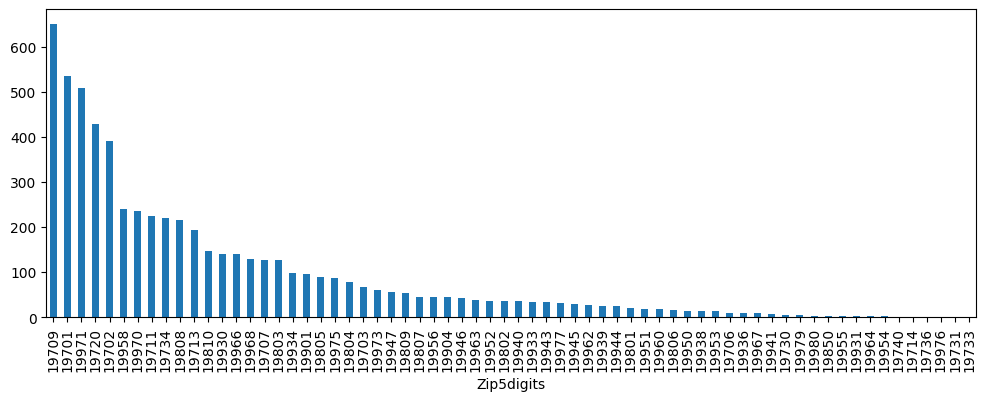

In [85]:
GEPG_PV_df['Zip5digits'].value_counts().plot.bar(figsize=(12,4))

In [86]:
year = '2020'

# Create shapefile query URL
city_shape_url = f"https://www2.census.gov/geo/tiger/TIGER{year}/PLACE/tl_{year}_10_place.zip"
city_gdf = gpd.read_file(city_shape_url)

In [87]:
city_gdf.head(1)

,STATEFP,PLACEFP,PLACENS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,PCICBSA,PCINECTA,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,10,64840,02391407,1064840,Selbyville,Selbyville town,43,C1,N,N,G4110,A,9276309,19781,+38.4621805,-075.2147712,"POLYGON ((-75.25512 38.47784, -75.25305 38.478..."


Text(0.5, 1.0, 'Cities')

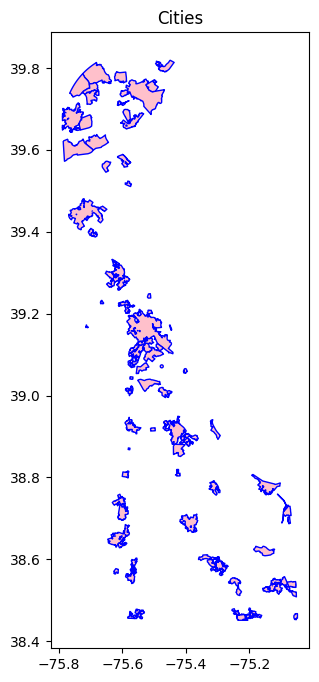

In [88]:
fig, ax = plt.subplots(figsize=(8,8))
city_gdf.plot(ax = ax, facecolor='pink',edgecolor='blue')
ax.set_title("Cities")

In data frame called GEPG_PV_df there is a column named "city" which contains names of some cities in Delaware. In another data frame called city_gdf there is a column named "NAME" and it contains the name of the cities in Delaware. How can I find out which names are included in "city" column but are not included in "NAME" column?

In [89]:
mapping_df = GEPG_PV_df.copy()

In [90]:
mapping_df['city'] = mapping_df['city'].str.lower()

In [91]:
mapping_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6066 entries, 0 to 6162
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   city                6066 non-null   object        
 1   sector              6066 non-null   object        
 2   pv_capacity_kw      6066 non-null   float64       
 3   total_system_costs  6066 non-null   float64       
 4   total_rebate        6066 non-null   float64       
 5   payment_status      6066 non-null   object        
 6   mounting_location   6066 non-null   object        
 7   ppa_lease           6066 non-null   object        
 8   Zip5digits          6066 non-null   object        
 9   date                6066 non-null   datetime64[ns]
 10  year                6066 non-null   object        
 11  month               6066 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(8)
memory usage: 745.1+ KB


In [92]:
## Finding suspicious city names by identifying the ones not included in Census:

# Convert the "city" column in GEPG_PV_df to a set with lowercase city names
mapping_df_city_set = set(mapping_df['city'])

# Convert the "NAME" column in city_gdf to a set with lowercase city names
city_gdf_name_set = set(city_gdf['NAME'].str.lower())

# Find the names in city_set_gepg that are not in city_set_gdf
names_not_in_city_gdf = mapping_df_city_set - city_gdf_name_set

# Convert the result back to a list if needed
names_not_in_city_gdf_list = list(names_not_in_city_gdf)

# Print or work with the names that are in "city" but not in "NAME"
print(sorted(names_not_in_city_gdf_list))


['19713', 'bearr', 'bethany beach,', 'bridegeville', 'bridgville', 'camden wyoming', 'camden-wyoming', 'christiana', 'clarksville', 'claymonth', 'de', 'delmas', 'dewey', 'example', 'fenwick', 'fredrica', 'harbeson', 'laruel', 'lewes de', 'marydel', 'midddletown', 'middeltown', 'middle town', 'middleton', 'middletwon', 'midletown', 'milton de 19968', 'new castle county', 'new castle de', 'neward', 'newcastle', 'ocean  view', 'ocean veiw', 'rehoboth', 'rehoboth beach de', 'rehoboth st', 'rohoboth beach', 's bethany', 's. bethany beach', 'selbyville de', 'selvyville', 'south bethany beach', 'st georges', 'townsednd', 'townsende', 'west hockessin', 'wilimington', 'wilmingon', 'wimington', 'yorklyn']


In [93]:
city_drop_list = ['19713', 'de', 'example', 'new castle county', 'new castle de', 'newcastle']
mapping_df = mapping_df.drop(mapping_df[mapping_df['city'].isin(city_drop_list)].index)

In [94]:
mapping_df['city'].replace({
    'bearr': 'bear',
    'bethany beach,': 'bethany beach',
    'bridegeville': 'bridgeville',
    'bridgville': 'bridgeville',
    'camden wyoming': 'camden',
    'camden-wyoming': 'camden',
    'claymonth': 'claymont',
    'delmas': 'delmar',
    'fredrica': 'frederica',
    'laruel': 'laurel',
    'lewes de': 'lewes',
    'midddletown': 'middletown',
    'middeltown': 'middletown',
    'middle town': 'middletown',
    'middleton': 'middletown',
    'middletwon': 'middletown',
    'midletown': 'middletown',
    'milton de 19968': 'milton',
    'neward': 'newark',
    'ocean veiw': 'ocean view',
    'ocean  view': 'ocean view',
    'rehoboth beach de': 'rehoboth beach',
    'rehoboth st': 'rehoboth', 
    'rohoboth beach': 'rehoboth beach',
    's bethany': 'bethany', 
    's. bethany beach': 'bethany beach',
    'selbyville de': 'selbyville', 
    'selvyville': 'selbyville',
    'south bethany beach': 'bethany beach',
    'st georges': 'saint georges',
    'townsednd': 'townsend',
    'townsende': 'townsend',
    'west hockessin': 'hockessin',
    'wilimington': 'wilmington', 
    'wilmingon': 'wilmington', 
    'wimington': 'wilmington',
    
}, inplace=True)

In [95]:
## Finding suspicious city names by identifying the ones not included in Census:

# Convert the "city" column in GEPG_PV_df to a set with lowercase city names
mapping_df_city_set = set(mapping_df['city'])

# Convert the "NAME" column in city_gdf to a set with lowercase city names
city_gdf_name_set = set(city_gdf['NAME'].str.lower())

# Find the names in city_set_gepg that are not in city_set_gdf
names_not_in_city_gdf = mapping_df_city_set - city_gdf_name_set

# Convert the result back to a list if needed
names_not_in_city_gdf_list = list(names_not_in_city_gdf)

# Print or work with the names that are in "city" but not in "NAME"
print(sorted(names_not_in_city_gdf_list))


['bethany', 'christiana', 'clarksville', 'dewey', 'fenwick', 'harbeson', 'marydel', 'rehoboth', 'saint georges', 'yorklyn']


In [96]:
## Finding city names have been assigned to more than one zip codes:

city_list = list(mapping_df['city'].unique())
for name in city_list:
    if len(list(mapping_df[mapping_df['city']==name]['Zip5digits'].value_counts().index)) > 1:
        zip_codes_list = list(mapping_df[mapping_df['city']==name]['Zip5digits'].value_counts().index)
        repetition_list = list(mapping_df[mapping_df['city']==name]['Zip5digits'].value_counts())
        print(name,":")
        for i in range(0,len(zip_codes_list)):
            print("    ",zip_codes_list[i],"(",repetition_list[i]," case)")

bear :
     19701 ( 530  case)
     19702 ( 1  case)
middletown :
     19709 ( 646  case)
     19720 ( 1  case)
ocean view :
     19970 ( 216  case)
     19971 ( 1  case)
rehoboth beach :
     19971 ( 481  case)
     19977 ( 1  case)
     19951 ( 1  case)
     19958 ( 1  case)
new castle :
     19720 ( 419  case)
     19740 ( 1  case)
     19805 ( 1  case)
wilmington :
     19808 ( 215  case)
     19810 ( 148  case)
     19803 ( 126  case)
     19805 ( 88  case)
     19804 ( 77  case)
     19809 ( 53  case)
     19807 ( 38  case)
     19802 ( 37  case)
     19801 ( 20  case)
     19806 ( 16  case)
     19850 ( 4  case)
newark :
     19702 ( 386  case)
     19711 ( 224  case)
     19713 ( 192  case)
     19701 ( 3  case)
     19714 ( 1  case)
     19703 ( 1  case)
     19709 ( 1  case)
     19720 ( 1  case)
harbeson :
     19951 ( 18  case)
     19952 ( 1  case)
lewes :
     19958 ( 240  case)
     19971 ( 1  case)
     19968 ( 1  case)
milton :
     19968 ( 128  case)
     19963 ( 1  c

## 3.2. Geolocating based on city name

In [97]:
from geopy.geocoders import Nominatim

In [98]:
# Create a Nominatim geocoder instance
geolocator = Nominatim(user_agent="city_geocoder")

In [99]:
def get_lat_lon(city_name):
    location = geolocator.geocode(city_name + ", Delaware, USA")
    if location:
        return location.latitude, location.longitude
    else:
        return None, None


In [100]:
city_names = list(sorted(set(mapping_df['city'])))
city_coordinates = {'city': [], 'latitude': [], 'longitude': []}

for city_name in city_names:
    latitude, longitude = get_lat_lon(city_name)
    if latitude is not None and longitude is not None:
        city_coordinates['city'].append(city_name)
        city_coordinates['latitude'].append(latitude)
        city_coordinates['longitude'].append(longitude)
    else:
        print(f"There was an error with {city_name}")

# Convert the dictionary to a new DataFrame
city_coordinates_df = pd.DataFrame(city_coordinates)

# Merge city_coordinates_df with mapping_df based on the 'city' column
mapping_df = mapping_df.merge(city_coordinates_df, on='city', how='left')

In [101]:
mapping_df.loc[mapping_df['city'] == 'middletown', ['latitude', 'longitude']] = (39.4495560, -75.7163207)

In [102]:
mapping_df.head(2)

,city,sector,pv_capacity_kw,total_system_costs,total_rebate,payment_status,mounting_location,ppa_lease,Zip5digits,date,year,month,latitude,longitude
0,bear,residential,0.300,3194.67,1322.38,paid,rooftop,owned,19701,2008-07-25,2008,07,39.629279,-75.658263
1,middletown,residential,0.426,3000.00,903.00,paid,rooftop,owned,19709,2008-04-07,2008,04,39.449556,-75.716321


In [103]:
# Create a GeoDataFrame from the latitude and longitude columns
geometry = gpd.points_from_xy(mapping_df['longitude'], mapping_df['latitude'])
mapping_gdf = gpd.GeoDataFrame(mapping_df, geometry=geometry)

In [104]:
mapping_gdf.head(2)

,city,sector,pv_capacity_kw,total_system_costs,total_rebate,payment_status,mounting_location,ppa_lease,Zip5digits,date,year,month,latitude,longitude,geometry
0,bear,residential,0.300,3194.67,1322.38,paid,rooftop,owned,19701,2008-07-25,2008,07,39.629279,-75.658263,POINT (-75.65826 39.62928)
1,middletown,residential,0.426,3000.00,903.00,paid,rooftop,owned,19709,2008-04-07,2008,04,39.449556,-75.716321,POINT (-75.71632 39.44956)


In [105]:
# Setting the CRS for mapping_gdf
mapping_gdf = mapping_gdf.set_crs(epsg=4269)

In [106]:
sldu_gdf = pygris.state_legislative_districts(state='DE',year=2020, cb=True)

Using FIPS code '10' for input 'DE'


## 3.3. Mapping Grant Receiving Cities

Creating maps of sldu with cities that have received grants in a specific year being identified as points:

In [107]:
# 2. Filter data for a specific year (e.g., 2020)
year_to_display = '2020'
filtered_gdf = mapping_gdf[mapping_gdf['year'] == year_to_display]

In [108]:
filtered_gdf.head(1)

,city,sector,pv_capacity_kw,total_system_costs,total_rebate,payment_status,mounting_location,ppa_lease,Zip5digits,date,year,month,latitude,longitude,geometry
1128,wilmington,residential,728.97,38875.0,364.485,unpaid,rooftop,owned,19810,2020-06-01 20:36:00,2020,06,39.745947,-75.546589,POINT (-75.54659 39.74595)


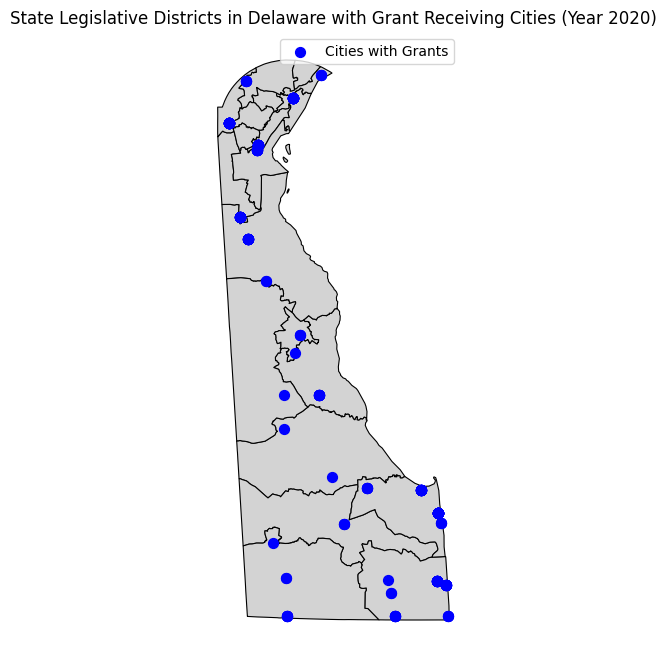

In [109]:
# 3. Create the map
fig, ax = plt.subplots(figsize=(12, 8))

# Plot legislative districts
sldu_gdf.plot(ax=ax, color='lightgray', edgecolor='black', linewidth=0.8)

# Plot cities with grant data as points
filtered_gdf.plot(ax=ax, color='blue', markersize=50, label='Cities with Grants')

# Set plot title and legend
ax.set_title(f'State Legislative Districts in Delaware with Grant Receiving Cities (Year {year_to_display})')
# ax.set_xlim([-75.9, -74.9])
# ax.set_ylim([38.4, 39.95])
ax.set_axis_off()
ax.legend(loc=0);

## 3.4. Mappping Total Grants per SLDU

Creating maps of sldu with approximation of the total grants in a specific year identified as color gradient:

### Determining corresponding distric for cities by performing spatial join

In [110]:
sldu_gdf = pygris.state_legislative_districts(state='DE',year=2020, cb=True);

Using FIPS code '10' for input 'DE'


In [111]:
# Perform the spatial join between legislative districts and grants data
joined_gdf = gpd.sjoin(sldu_gdf, mapping_gdf, how="left", op="intersects")

/Users/kamran/anaconda3/envs/pygris/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [112]:
joined_gdf.head(1)

,STATEFP,SLDUST,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,LSY,ALAND,AWATER,geometry,index_right,city,sector,pv_capacity_kw,total_system_costs,total_rebate,payment_status,mounting_location,ppa_lease,Zip5digits,date,year,month,latitude,longitude
0,10,016,610U600US10016,10016,16,State Senate District 16,DE,Delaware,LU,2018,356355352,435453970,"POLYGON ((-75.60942 39.07697, -75.60485 39.079...",5892.0,viola,residential,20000.0,74600.0,8000.0,pending,rooftop,lease,19979,2015-04-27 22:11:00,2015,04,39.042891,-75.57187


In [113]:
joined_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 6064 entries, 0 to 20
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   STATEFP             6064 non-null   object        
 1   SLDUST              6064 non-null   object        
 2   AFFGEOID            6064 non-null   object        
 3   GEOID               6064 non-null   object        
 4   NAME                6064 non-null   object        
 5   NAMELSAD            6064 non-null   object        
 6   STUSPS              6064 non-null   object        
 7   STATE_NAME          6064 non-null   object        
 8   LSAD                6064 non-null   object        
 9   LSY                 6064 non-null   object        
 10  ALAND               6064 non-null   int64         
 11  AWATER              6064 non-null   int64         
 12  geometry            6064 non-null   geometry      
 13  index_right         6060 non-null   float64    

In [114]:
joined_gdf['SLDUST'].nunique()

21

In [115]:
joined_gdf[joined_gdf.isnull().any(axis=1)]['SLDUST'].tolist()

['007', '002', '005', '009']

In [116]:
joined_gdf[joined_gdf['SLDUST'].isin(joined_gdf[joined_gdf.isnull().any(axis=1)]['SLDUST'].tolist())]

,STATEFP,SLDUST,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,LSY,ALAND,AWATER,geometry,index_right,city,sector,pv_capacity_kw,total_system_costs,total_rebate,payment_status,mounting_location,ppa_lease,Zip5digits,date,year,month,latitude,longitude
2,10,007,610U600US10007,10007,7,State Senate District 7,DE,Delaware,LU,2018,32690980,11967,"POLYGON ((-75.67933 39.75051, -75.67734 39.752...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
9,10,002,610U600US10002,10002,2,State Senate District 2,DE,Delaware,LU,2018,35688670,26002122,"POLYGON ((-75.58174 39.69019, -75.57893 39.693...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
13,10,005,610U600US10005,10005,5,State Senate District 5,DE,Delaware,LU,2018,36319081,24965,"POLYGON ((-75.54976 39.81308, -75.54908 39.816...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
18,10,009,610U600US10009,10009,9,State Senate District 9,DE,Delaware,LU,2018,51317082,68469,"POLYGON ((-75.73829 39.67162, -75.73624 39.675...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN


It is possible that these four districts have never received any grants. Let's drop them.

In [117]:
joined_gdf.drop(joined_gdf[joined_gdf.isnull().any(axis=1)].index,inplace=True)

### Aggregating data for a single year and for a single sector

In [118]:
year_to_display = '2021'
sector = 'residential'
filtered_gdf = joined_gdf[(joined_gdf['year'] == year_to_display) & (joined_gdf['sector'] == sector)]

In [119]:
# Group and aggregate data by legislative district
agg_data = filtered_gdf.groupby('SLDUST').agg({
    'total_system_costs': ['sum','count'],
    'total_rebate': 'sum',
    'pv_capacity_kw': 'sum'
}).reset_index()

# Rename the columns for clarity
agg_data.columns = ['SLDUST', 'system_costs', 'system_count', 'rebate', 'capacity']

In [120]:
agg_data.head(2)

,SLDUST,system_costs,system_count,rebate,capacity
0,001,445802.0,12,58636.0,95150.0
1,003,2452649.0,74,370138.0,637265.0


In [121]:
agg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SLDUST        17 non-null     object 
 1   system_costs  17 non-null     float64
 2   system_count  17 non-null     int64  
 3   rebate        17 non-null     float64
 4   capacity      17 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 808.0+ bytes


### Merge the aggregated data back into the sldu GeoDataFrame to give it district geometry

In [122]:
# Merge the aggregated data back into the legislative districts GeoDataFrame
sldu_gdf = sldu_gdf.merge(agg_data, left_on='SLDUST', right_on='SLDUST', how='left')

In [123]:
# As shown earlier, some districts did not receive grants. Let's set them to zero.
sldu_gdf.fillna(value=0, inplace=True);

In [124]:
sldu_gdf.head(1)

,STATEFP,SLDUST,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,LSY,ALAND,AWATER,geometry,system_costs,system_count,rebate,capacity
0,10,016,610U600US10016,10016,16,State Senate District 16,DE,Delaware,LU,2018,356355352,435453970,"POLYGON ((-75.60942 39.07697, -75.60485 39.079...",293352.0,9.0,43512.6,74499.0


In [125]:
sldu_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   STATEFP       21 non-null     object  
 1   SLDUST        21 non-null     object  
 2   AFFGEOID      21 non-null     object  
 3   GEOID         21 non-null     object  
 4   NAME          21 non-null     object  
 5   NAMELSAD      21 non-null     object  
 6   STUSPS        21 non-null     object  
 7   STATE_NAME    21 non-null     object  
 8   LSAD          21 non-null     object  
 9   LSY           21 non-null     object  
 10  ALAND         21 non-null     int64   
 11  AWATER        21 non-null     int64   
 12  geometry      21 non-null     geometry
 13  system_costs  21 non-null     float64 
 14  system_count  21 non-null     float64 
 15  rebate        21 non-null     float64 
 16  capacity      21 non-null     float64 
dtypes: float64(4), geometry(1), int64(2), object(10)

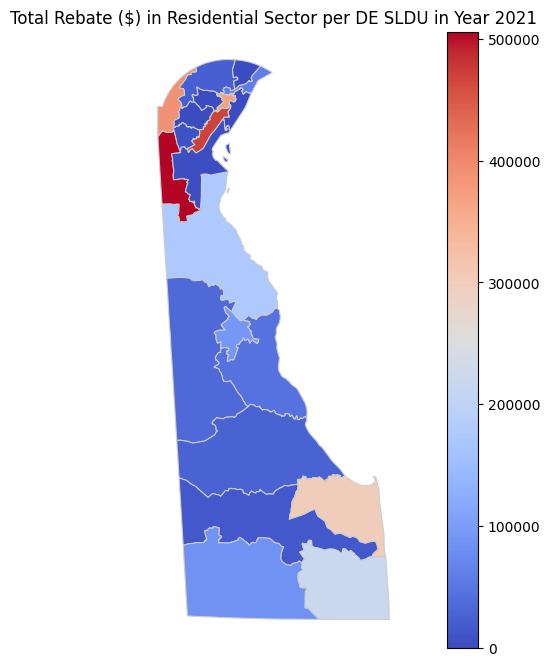

In [126]:
# Plot the legislative districts with color-coded features
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Choose the feature you want to visualize (e.g., 'total_system_costs')
feature_to_visualize = 'rebate'

# Plot the districts using color mapping based on the chosen feature
sldu_gdf.plot(column=feature_to_visualize, cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Customize plot settings, such as title and legend
ax.set_title(f'Total Rebate ($) in Residential Sector per DE SLDU in Year {year_to_display}')
ax.set_axis_off()

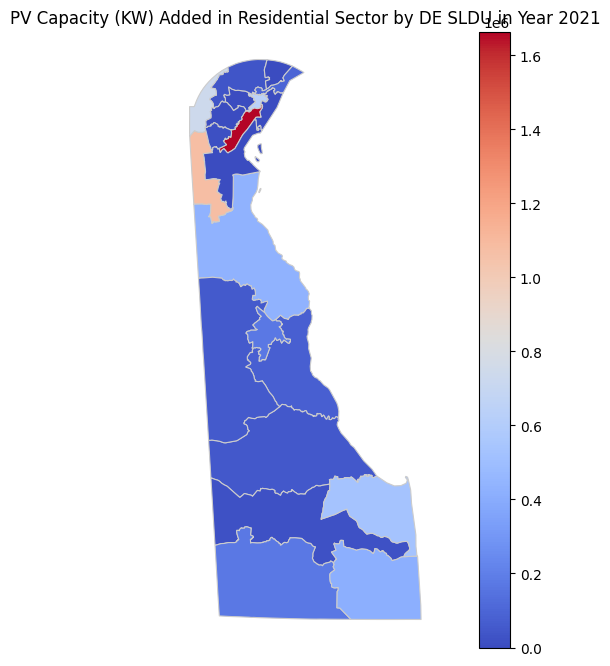

In [127]:
# Plot the legislative districts with color-coded features
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Choose the feature you want to visualize (e.g., 'total_system_costs')
feature_to_visualize = 'capacity'

# Plot the districts using color mapping based on the chosen feature
sldu_gdf.plot(column=feature_to_visualize, cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Customize plot settings, such as title and legend
ax.set_title(f'PV Capacity (KW) Added in Residential Sector by DE SLDU in Year {year_to_display}')
ax.set_axis_off()

## 3.5. Creating GeoJSON Files

### ***3.5.1. Creating separate dataframe based on the sectors***

In [128]:
joined_gdf = joined_gdf[(joined_gdf['year'].astype('int64').values > 2011) & (joined_gdf['year'].astype('int64').values < 2023)]

In [129]:
all_sectors_gdf = joined_gdf[['SLDUST','geometry','sector',
                         'total_system_costs','total_rebate','pv_capacity_kw','year']]

In [130]:
all_sectors_gdf[all_sectors_gdf.isnull().any(axis=1)]

,SLDUST,geometry,sector,total_system_costs,total_rebate,pv_capacity_kw,year


In [131]:
all_sectors_gdf.head(1)

,SLDUST,geometry,sector,total_system_costs,total_rebate,pv_capacity_kw,year
0,016,"POLYGON ((-75.60942 39.07697, -75.60485 39.079...",residential,74600.0,8000.0,20000.0,2015


In [132]:
all_sectors_gdf = all_sectors_gdf.sort_values(by=['SLDUST','year']).reset_index(drop=True)

In [133]:
all_sectors_gdf.rename(columns={'SLDUST':'district',
                               'pv_capacity_kw':'capacity',
                                'total_system_costs':'system_cost',
                                'total_rebate':'rebate',
                               },inplace=True)

In [134]:
all_sectors_gdf.head(1)

,district,geometry,sector,system_cost,rebate,capacity,year
0,001,"POLYGON ((-75.58748 39.75811, -75.57857 39.754...",residential,40000.0,7645.0,6.86,2012


In [135]:
all_sectors_gdf['sector'].unique()

array(['residential', 'non_profit', 'non_residential'], dtype=object)

In [136]:
all_sectors_gdf = all_sectors_gdf.astype({'district':'int64','year':'int64'})

In [137]:
nonResidential_df = all_sectors_gdf[all_sectors_gdf['sector']=='non_residential'][['year','district','capacity',
                                                                                  'system_cost','rebate']].reset_index(drop=True)

In [138]:
nonResidential_df = nonResidential_df.groupby(['district','year']).agg({
    'system_cost': ['sum','count'],
    'rebate': 'sum',
    'capacity': 'sum'
}).reset_index()

# Rename the columns for clarity
nonResidential_df.columns = ['district', 'year', 'system_cost', 'system_count', 'rebate', 'capacity']

In [139]:
residential_df = all_sectors_gdf[all_sectors_gdf['sector']=='residential'][['year','district','capacity',
                                                                            'system_cost','rebate']].reset_index(drop=True)

In [140]:
residential_df = residential_df.groupby(['district','year']).agg({
    'system_cost': ['sum','count'],
    'rebate': 'sum',
    'capacity': 'sum'
}).reset_index()

# Rename the columns for clarity
residential_df.columns = ['district', 'year', 'system_cost', 'system_count', 'rebate', 'capacity']

In [141]:
nonProfit_df = all_sectors_gdf[all_sectors_gdf['sector']=='non_profit'][['year','district','capacity',
                                                                            'system_cost','rebate']].reset_index(drop=True)

In [142]:
nonProfit_df = nonProfit_df.groupby(['district','year']).agg({
    'system_cost': ['sum','count'],
    'rebate': 'sum',
    'capacity': 'sum'
}).reset_index()

# Rename the columns for clarity
nonProfit_df.columns = ['district', 'year', 'system_cost', 'system_count', 'rebate', 'capacity']

We should truncate mapping data for any data before 2012.
https://redistricting.lls.edu/state/delaware/?cycle=2010&level=State%20Lower&startdate=2011-07-08

In [143]:
nonResidential_df['year'].min()

2012

In [144]:
residential_df['year'].min()

2012

In [145]:
nonProfit_df['year'].min()

2013

### ***3.5.2. Adding zero value to missing districts for all years and senator names***

In [146]:
def add_missing_rows(df):
    """
    Add missing rows to a DataFrame for combinations of 'year' and 'district'.

    This function takes a DataFrame containing columns 'year' and 'district' to be extended. It adds rows to the
    DataFrame for each year-district combination within the range from the minimum year in the 'year' column to 2022.
    Any missing combination of 'year' and 'district' is filled with zero values for all other columns.

    Parameters:
    - df (pd.DataFrame): The input DataFrame to be extended.

    Returns:
    pd.DataFrame: The DataFrame with missing rows added and sorted by 'year'.
    """

    # Determine the minimum year from the dataframe
    min_year = df['year'].min()
    max_year = 2022
    
    # Sort the DataFrame by 'year'
    df = df.sort_values(by='year')

    # Create an empty DataFrame to store the new rows
    new_rows = pd.DataFrame(columns=df.columns)

    # Iterate through years from the minimum to max_year
    for year in range(min_year, max_year + 1):
        # Iterate through districts 1 to 21
        for district in range(1, 22):
            # Check if the combination of 'year' and 'district' already exists in the DataFrame
            if not ((df['year'] == year) & (df['district'] == district)).any():
                # Create a new row with zeros for all columns except 'year' and 'district'
                new_row = {'year': year, 'district': district}
                new_row.update({col: 0 for col in df.columns if col not in ['year', 'district']})
                # Append the new row to the DataFrame
                new_rows = pd.concat([new_rows, pd.DataFrame(new_row, index=[0])], ignore_index=True)

    # Concatenate the original DataFrame with the new rows
    df = pd.concat([df, new_rows])

    # Sort the DataFrame by 'year' again to ensure it's in the desired order
    df = df.sort_values (by=['year','district'])

    # Reset the index to have a clean index order
    df = df.reset_index(drop=True)

    return df


In [147]:
nonProfit_df = add_missing_rows(nonProfit_df)

In [148]:
nonResidential_df = add_missing_rows(nonResidential_df)

In [149]:
residential_df = add_missing_rows(residential_df)

In [150]:
# import senator names.
names_df = pd.read_csv('/Users/kamran/Downloads/Datasets/senators.csv')

def add_senator_names(df):
    """
    Add senator names to nonProfit_df based on district ids.

    Parameters:
    - nonProfit_df: DataFrame containing district ids ('district' column)
    - names_df: DataFrame containing district ids ('District' column) and senator names ('Name' column)

    Returns:
    - nonProfit_with_names_df: DataFrame with added senator names
    """
    # Merge the two DataFrames based on the 'district' column
    df_with_names = pd.merge(df, names_df[['District', 'Name']], left_on='district', right_on='District', how='left')

    # Drop the duplicate 'District' column from the merge
    df_with_names = df_with_names.drop('District', axis=1)

    return df_with_names

In [151]:
nonProfit_df = add_senator_names(nonProfit_df)

In [152]:
nonResidential_df = add_senator_names(nonResidential_df)

In [153]:
residential_df = add_senator_names(residential_df)

### ***3.5.3. Adding geometry for each sector and creating GeoJSON files***

In [154]:
geometry_2021 = pygris.state_legislative_districts(state='DE',year=2021, cb=True)

Using FIPS code '10' for input 'DE'


In [155]:
geometry_2021.rename(columns={'SLDUST':'District'},inplace=True)
geometry_2021['District'] = geometry_2021['District'].astype('int64')

In [156]:
import json
from shapely.geometry import mapping

In [157]:
def dataframe_to_geojson(df, name, output_file):
    """
    Convert a DataFrame to a GeoJSON file.

    Parameters:
    - df (pd.DataFrame): The input DataFrame to be converted to GeoJSON.
    - name (str): The name of the GeoJSON collection.
    - output_file (str): The name of the output GeoJSON file.

    Returns:
    None
    """
    # Create a FeatureCollection dictionary
    feature_collection = {
        "type": "FeatureCollection",
        "name": name,
        "features": []
    }

    # Loop through each district
    for district in df['district'].unique():
        district_data = df[df['district'] == district]

        # Create a Feature for the district
        feature = {
            "type": "Feature",
            "properties": {
                "district": str(district),
                "data": district_data.to_dict(orient='records')
            },
            "geometry": mapping(geometry_2021[geometry_2021['District'] == district]['geometry'].iloc[0])
        }

        # Append the Feature to the FeatureCollection
        feature_collection["features"].append(feature)

    # Convert the FeatureCollection to a JSON string
    geojson_string = json.dumps(feature_collection)

    # Save the GeoJSON string to a file
    with open(output_file, "w") as geojson_file:
        geojson_file.write(geojson_string)

In [158]:
dataframe_to_geojson(nonProfit_df, "Non-Profit", "GeoJSON/nonProfit.geojson")

In [159]:
dataframe_to_geojson(nonResidential_df, "Non-Residential", "GeoJSON/nonResidential.geojson")

In [160]:
dataframe_to_geojson(residential_df, "Residential", "GeoJSON/residential.geojson")

## 3.6. Uploading GeoJSON files to Azure

In [161]:
filename =  ['GeoJSON/nonProfit.geojson','GeoJSON/nonResidential.geojson','GeoJSON/residential.geojson']

In [162]:
import azure
from azure.storage.blob import BlobServiceClient, BlobClient, ContainerClient
import os
import re
import yaml

In [163]:
# As a class to preserve state
class AzureBlobStorageManager:
    def __init__(self, connection_str: str, container_name: str):
        self.blob_service_client = BlobServiceClient.from_connection_string(connection_str)
        self.container_client = self.blob_service_client.get_container_client(container_name)

    def upload_blob(self, local_path: str,  blob_name=None):
        """Upload a local file to blob storage in Azure"""

        # Default blob_name = local filename 
        if blob_name is None:
            blob_name = os.path.basename(local_path)
        blob_client = self.container_client.get_blob_client(blob_name)
        
        try:
            # Upload the blob
            with open(local_path, "rb") as data:
                blob_client.upload_blob(data,overwrite=True)
            print(f"Blob {blob_name} uploaded successfully.")
        except Exception as e: # Do something with this exception block (e.g. add logging)
            print(f"An error occurred: {str(e)}")

In [164]:
# Testing class and method 
#with open("azure_info.yaml", "r") as file: 
 #   azure_info = yaml.full_load(file)

connection_string =  # Azure container/Access Key/Under Key1, Connection String.
container_name =  # The name comes from Containers. 
local_path = filename

az_blob_manager = AzureBlobStorageManager(connection_str=connection_string,
                                          container_name=container_name)
for i in filename:
    az_blob_manager.upload_blob(i)

Blob nonProfit.geojson uploaded successfully.
Blob nonResidential.geojson uploaded successfully.
Blob residential.geojson uploaded successfully.


# **4. Adding Census Data**

## 4.1. Preparing GEPG data

In [165]:
residential_df.head(10)

,district,year,system_cost,system_count,rebate,capacity,Name
0,1,2012,40000.0,1,7645.0,6.86,Sarah McBride
1,2,2012,0,0,0,0,Darius J. Brown
2,3,2012,351500.6,15,96000.0,81.88,S. Elizabeth Lockman
3,4,2012,159611.6,6,41620.5,42.31,Laura V. Sturgeon
4,5,2012,0,0,0,0,Kyle Evans Gay
5,6,2012,1995506.05,62,438728.75,398.035,Russell Huxtable
6,7,2012,0,0,0,0,Spiros Mantzavinos
7,8,2012,275227.55,9,67508.75,62.82,David P. Sokola
8,9,2012,0,0,0,0,"John ""Jack"" Walsh"
9,10,2012,250643.5,9,68535.75,63.335,Stephanie L. Hansen


## 4.2. Preparing Census data

In [166]:
import os
import requests

In [167]:
usr_key = 

In [168]:
census_df_list = []

for i in range(2012,2022): 
    
    year = str(i)

    host = 'https://api.census.gov/data'
    dataset_acronym = '/acs/acs5'
    g = '?get='
    variables = 'NAME,B01001_001E,B25003_002E,B25040_008E'
    location = '&for=state%20legislative%20district%20(upper%20chamber):*&in=state:10'

    # Put it all together in one f-string:
    query_url = f"{host}/{year}{dataset_acronym}{g}{variables}{location}&key={usr_key}"

    response = requests.get(query_url)

    # Convert the JSON response to a list of lists (excluding the header)
    data = response.json()[1:]

    # Convert the list of lists into a DataFrame
    columns = response.json()[0]  # Use the first row as column names
    api_data_df = pd.DataFrame(data, columns=columns)
    api_data_df.rename(columns={'B01001_001E':'Total Population',
                               'B25003_002E':'Owner Occupied Households',
                               'B25040_008E':'Solar Households',
                               'state legislative district (upper chamber)':'district'},inplace=True)
    api_data_df.drop('state',axis=1,inplace=True)
    api_data_df = api_data_df.astype({'Total Population':'int64',
                                      'Owner Occupied Households':'int64',
                                      'Solar Households':'int64',
                                     'district':'int64'})
    api_data_df['Solar Households per 1000'] = round((api_data_df['Solar Households'] 
                                                      / api_data_df['Owner Occupied Households'])
                                                     * 1000, 0).astype('int64')
    # names_df = pd.read_csv('/Users/kamran/Downloads/Datasets/senators.csv')
    # api_data_df = names_df.merge(api_data_df, left_on="District", right_on="district")

    census_df_list.append(api_data_df)

## 4.3. Merging GEPG with Census

In [169]:
# Merge data from census_df_list into residential_df
merged_dfs = []

for year, census_df in zip(range(2012, 2023), census_df_list):  
    # Merge based on 'district' and 'district', and 'year' columns
    merged_df = pd.merge(residential_df[residential_df['year'] == year],
                         census_df[['Total Population', 
                                    'Solar Households', 
                                    'Solar Households per 1000', 
                                    'district']],
                         left_on='district', right_on='district', how='right')
    # merged_df.drop('district',axis=1,inplace=True)
    merged_df['year'].fillna(value=year,inplace=True)
    merged_df.fillna(value=0,inplace=True)
    merged_df['year'] = merged_df['year'].astype('int64')

    # Append the merged DataFrame to the list
    merged_dfs.append(merged_df)

# Concatenate all the DataFrames in the list
final_merged_df = pd.concat(merged_dfs, ignore_index=True)

## 4.4. Adding geometry to Census+GEPG data

In [170]:
# Create a FeatureCollection dictionary
feature_collection = {
    "type": "FeatureCollection",
    "name": "Residential",
    "features": []
}

# Loop through each district
for district in final_merged_df['district'].unique():
    district_data = final_merged_df[final_merged_df['district'] == district]

    # Create a Feature for the district
    feature = {
        "type": "Feature",
        "properties": {
            "district": str(district),
            "data": district_data.to_dict(orient='records')
        },
        "geometry": mapping(geometry_2021[geometry_2021['District'] == district]['geometry'].iloc[0])
    }
    
    # Append the Feature to the FeatureCollection
    feature_collection["features"].append(feature)

# Convert the FeatureCollection to a JSON string
geojson_string = json.dumps(feature_collection)

# Save the GeoJSON string to a file
with open("GeoJSON/residential_census.geojson", "w") as geojson_file:
    geojson_file.write(geojson_string)


## 4.5. Uploading GeoJSON file to Azure

In [171]:
filename =  ['GeoJSON/residential_census.geojson']

In [172]:
import azure
from azure.storage.blob import BlobServiceClient, BlobClient, ContainerClient
import os
import re
import yaml

In [173]:
# As a class to preserve state
class AzureBlobStorageManager:
    def __init__(self, connection_str: str, container_name: str):
        self.blob_service_client = BlobServiceClient.from_connection_string(connection_str)
        self.container_client = self.blob_service_client.get_container_client(container_name)

    def upload_blob(self, local_path: str,  blob_name=None):
        """Upload a local file to blob storage in Azure"""

        # Default blob_name = local filename 
        if blob_name is None:
            blob_name = os.path.basename(local_path)
        blob_client = self.container_client.get_blob_client(blob_name)
        
        try:
            # Upload the blob
            with open(local_path, "rb") as data:
                blob_client.upload_blob(data,overwrite=True)
            print(f"Blob {blob_name} uploaded successfully.")
        except Exception as e: # Do something with this exception block (e.g. add logging)
            print(f"An error occurred: {str(e)}")

In [174]:
# Testing class and method 
#with open("azure_info.yaml", "r") as file: 
 #   azure_info = yaml.full_load(file)

connection_string =  # Azure container/Access Key/Under Key1, Connection String.
container_name =  # The name comes from Containers. 
local_path = filename

az_blob_manager = AzureBlobStorageManager(connection_str=connection_string,
                                          container_name=container_name)
for i in filename:
    az_blob_manager.upload_blob(i)

Blob residential_census.geojson uploaded successfully.


# **5. Creating Cumulative Maps** 

## 5.1. Preparing the data and converting to GeoJSON

In [175]:
column_types = {
    'district': 'int64',
    'year': 'int64',
    'system_cost': 'float64',
    'system_count': 'int64',
    'rebate': 'float64',
    'capacity': 'float64'
}

nonProfit_df = nonProfit_df.astype(column_types)
nonResidential_df = nonResidential_df.astype(column_types)
residential_df = residential_df.astype(column_types)

In [176]:
nonProfit_df.drop('Name',axis=1,inplace=True)

In [177]:
nonResidential_df.drop('Name',axis=1,inplace=True)

In [178]:
residential_df.drop('Name',axis=1,inplace=True)

In [179]:
final_merged_df.head(1)

,district,year,system_cost,system_count,rebate,capacity,Name,Total Population,Solar Households,Solar Households per 1000
0,6,2012,1995506.05,62,438728.75,398.035,Russell Huxtable,40710,9,1


In [180]:
final_merged_df.drop('Name',axis=1,inplace=True)

In [181]:
column_types = {
    'district': 'int64',
    'year': 'int64',
    'system_cost': 'float64',
    'system_count': 'int64',
    'rebate': 'float64',
    'capacity': 'float64', 
    'Total Population': 'int64', 
    'Solar Households': 'int64', 
    'Solar Households per 1000': 'int64'
}

final_merged_df = final_merged_df.astype(column_types)

In [182]:
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   district                   210 non-null    int64  
 1   year                       210 non-null    int64  
 2   system_cost                210 non-null    float64
 3   system_count               210 non-null    int64  
 4   rebate                     210 non-null    float64
 5   capacity                   210 non-null    float64
 6   Total Population           210 non-null    int64  
 7   Solar Households           210 non-null    int64  
 8   Solar Households per 1000  210 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 14.9 KB


In [183]:
def create_cumulative_df(input_df, id_column, time_column):
    """
    Create a new DataFrame with cumulative sums for each column, grouped by specified ID and time columns.

    Parameters:
    - input_df: DataFrame to be converted
    - id_column: Name of the ID column (default is 'district')
    - time_column: Name of the time column (default is 'year')

    Returns:
    - results_df: DataFrame with cumulative sums
    """

    # Create a new DataFrame to store the results
    result_df = input_df.copy()

    # Sort the DataFrame by the specified columns
    result_df = result_df.sort_values(by=[id_column, time_column])

    # Iterate through each ID
    for id_value in result_df[id_column].unique():
        # Filter rows for the current ID
        id_df = result_df[result_df[id_column] == id_value]

        # Calculate the cumulative sum for each column (excluding ID and time columns)
        for col in id_df.columns[2:]:  # Exclude ID and time columns
            id_df[col] = id_df.groupby(id_column)[col].cumsum()

        # Update the result DataFrame with the cumulative sums for the current ID
        result_df.loc[id_df.index] = id_df

    # Reset the index of the result DataFrame
    result_df = result_df.reset_index(drop=True)

    # Optionally, sort the DataFrame by the specified columns for better visualization
    result_df = result_df.sort_values(by=[time_column, id_column])

    return result_df

In [184]:
nonProfit_cum_df = create_cumulative_df(nonProfit_df,'district','year')

/var/folders/75/y16smf2j5032r_8n2vhxct6r0000gn/T/ipykernel_25014/2873075486.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  id_df[col] = id_df.groupby(id_column)[col].cumsum()


In [185]:
nonResidential_cum_df = create_cumulative_df(nonResidential_df,'district','year')

/var/folders/75/y16smf2j5032r_8n2vhxct6r0000gn/T/ipykernel_25014/2873075486.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  id_df[col] = id_df.groupby(id_column)[col].cumsum()


In [186]:
residential_cum_df = create_cumulative_df(residential_df,'district','year')

/var/folders/75/y16smf2j5032r_8n2vhxct6r0000gn/T/ipykernel_25014/2873075486.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  id_df[col] = id_df.groupby(id_column)[col].cumsum()


In [187]:
resid_census_cum_df = create_cumulative_df(final_merged_df,'district','year')

/var/folders/75/y16smf2j5032r_8n2vhxct6r0000gn/T/ipykernel_25014/2873075486.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  id_df[col] = id_df.groupby(id_column)[col].cumsum()


In [188]:
nonProfit_cum_df = add_senator_names(nonProfit_cum_df)

In [189]:
nonResidential_cum_df = add_senator_names(nonResidential_cum_df)

In [190]:
residential_cum_df = add_senator_names(residential_cum_df)

In [191]:
resid_census_cum_df = add_senator_names(resid_census_cum_df)

In [192]:
dataframe_to_geojson(nonProfit_cum_df, "Non-Profit_cum", "GeoJSON/cum_nonProfit.geojson")

In [193]:
dataframe_to_geojson(nonResidential_cum_df, "Non-Residential_cum", "GeoJSON/cum_nonResidential.geojson")

In [194]:
dataframe_to_geojson(residential_cum_df, "Residential_cum", "GeoJSON/cum_residential.geojson")

In [195]:
dataframe_to_geojson(resid_census_cum_df, "Residential_cum", "GeoJSON/cum_resid_census.geojson")

## 5.2. Uploading GeoJSON file to Azure

In [196]:
filename =  ['GeoJSON/cum_nonProfit.geojson',
             'GeoJSON/cum_nonResidential.geojson',
             'GeoJSON/cum_residential.geojson',
             'GeoJSON/cum_resid_census.geojson']

In [197]:
# As a class to preserve state
class AzureBlobStorageManager:
    def __init__(self, connection_str: str, container_name: str):
        self.blob_service_client = BlobServiceClient.from_connection_string(connection_str)
        self.container_client = self.blob_service_client.get_container_client(container_name)

    def upload_blob(self, local_path: str,  blob_name=None):
        """Upload a local file to blob storage in Azure"""

        # Default blob_name = local filename 
        if blob_name is None:
            blob_name = os.path.basename(local_path)
        blob_client = self.container_client.get_blob_client(blob_name)
        
        try:
            # Upload the blob
            with open(local_path, "rb") as data:
                blob_client.upload_blob(data,overwrite=True)
            print(f"Blob {blob_name} uploaded successfully.")
        except Exception as e: # Do something with this exception block (e.g. add logging)
            print(f"An error occurred: {str(e)}")

In [198]:
# Testing class and method 
#with open("azure_info.yaml", "r") as file: 
 #   azure_info = yaml.full_load(file)

connection_string =  # Azure container/Access Key/Under Key1, Connection String.
container_name =  # The name comes from Containers. 
local_path = filename

az_blob_manager = AzureBlobStorageManager(connection_str=connection_string,
                                          container_name=container_name)
for i in filename:
    az_blob_manager.upload_blob(i)

Blob cum_nonProfit.geojson uploaded successfully.
Blob cum_nonResidential.geojson uploaded successfully.
Blob cum_residential.geojson uploaded successfully.
Blob cum_resid_census.geojson uploaded successfully.
